## EDA: Movielens Dataset (Samples)

First of all we import the needed libraries.

In [19]:
# import the needed libraries for the EDA
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


We read the cleaned file for the Movielens

In [20]:
# we read the Movielens cleaned data
# we set the directory to the cleaned folder
os.listdir(os.path.join('.', 'cleaned'))

['final_sample30_parquet',
 'final_sample5_parquet',
 'movielens_parquet',
 'netflix_parquet',
 'sample_tenth_netflix',
 'unpacked_reviews_df_100k.parquet']

After importing the needed libraries, we will start looking at the content of the Movielens

In [21]:
ML = pd.read_parquet('cleaned/movielens_parquet')

We are going to take two different samples of the cleaned file.

In [22]:
# Extracting samples of 5% and 30%
sample_5_percent = ML.sample(frac=0.05, random_state=42)
sample_30_percent = ML.sample(frac=0.3, random_state=42)
sample_50_percent = ML.sample(frac=0.5, random_state=42)

First of all we look into the shape and size of the data, to see how many different movies we have.

In [23]:
# we check the columns of the dataframe
print(ML.columns)

Index(['movieId', 'title', 'genres', 'year', 'review_data', 'imdbId',
       'tmdbId'],
      dtype='object')


In [24]:
# We print the shape of the dataframe and the number of unique movies
print(ML.shape)
print(ML['movieId'].nunique())

(9742, 7)
9742


In [25]:
# We describe the dataframe
sample_5_percent.describe()

,movieId,imdbId,tmdbId
count,487.000000,4.870000e+02,486.000000
mean,41852.443532,6.765560e+05,56886.279835
std,51656.190774,1.077274e+06,93118.367981
min,1.000000,5.160000e+02,33.000000
25%,3116.000000,9.291250e+04,9554.500000
50%,7069.000000,1.421920e+05,16288.000000
75%,77004.000000,8.998255e+05,49416.500000
max,186587.000000,7.544820e+06,482004.000000


In [26]:
# We describe the dataframe
sample_30_percent.describe()

,movieId,imdbId,tmdbId
count,2923.000000,2.923000e+03,2920.000000
mean,41769.180978,6.762775e+05,55632.191096
std,52207.471941,1.124178e+06,94478.141538
min,1.000000,4.170000e+02,5.000000
25%,3168.500000,9.495200e+04,9542.750000
50%,7171.000000,1.529300e+05,16342.000000
75%,74480.000000,7.834205e+05,43866.500000
max,193587.000000,8.391976e+06,502616.000000


In [27]:
# We describe the dataframe
sample_50_percent.describe()

,movieId,imdbId,tmdbId
count,4871.00000,4.871000e+03,4866.000000
mean,40966.57442,6.677261e+05,54722.181874
std,51656.15367,1.119625e+06,93705.293051
min,1.00000,4.170000e+02,2.000000
25%,3071.50000,9.560300e+04,9540.500000
50%,7116.00000,1.557530e+05,16369.000000
75%,73074.00000,4.973970e+05,43523.750000
max,193609.00000,8.391976e+06,525662.000000


We have to check if there are NaN values

In [28]:
# We check if there are NaN values in the dataframe where we print the percentages of NaN values
def check_nan(df):
    nan_values = df.isna().sum()
    nan_values = nan_values[nan_values > 0]
    nan_values = nan_values / len(df)
    print(nan_values)

check_nan(ML)

year      0.001334
tmdbId    0.000821
dtype: float64


In [29]:
# We print the content of the dataframe
sample_50_percent.head()
sample_30_percent.head()
sample_5_percent.head()

,movieId,title,genres,year,review_data,imdbId,tmdbId
6213,45635,"Notorious Bettie Page, The",[Drama],2005,"[{'date': 2008-07-15, 'rating': 3.0, 'tag': No...",404802,15402.0
1056,1373,Star Trek V: The Final Frontier,"[Action, Sci-Fi]",1989,"[{'date': 2000-08-08, 'rating': 1.0, 'tag': No...",98382,172.0
4891,7325,Starsky & Hutch,"[Action, Comedy, Crime, Thriller]",2004,"[{'date': 2005-04-11, 'rating': 3.0, 'tag': No...",335438,9384.0
346,389,"Colonel Chabert, Le","[Drama, Romance, War]",1994,"[{'date': 2001-05-25, 'rating': 5.0, 'tag': No...",109454,41580.0
5353,8920,"Country Girl, The",[Drama],1954,"[{'date': 2009-03-29, 'rating': 3.5, 'tag': 'O...",46874,2438.0


In [30]:
# We print the type of the columns
print(sample_50_percent.dtypes)
print(sample_30_percent.dtypes)
print(sample_5_percent.dtypes)

movieId          int64
title           object
genres          object
year            object
review_data     object
imdbId           int64
tmdbId         float64
dtype: object
movieId          int64
title           object
genres          object
year            object
review_data     object
imdbId           int64
tmdbId         float64
dtype: object
movieId          int64
title           object
genres          object
year            object
review_data     object
imdbId           int64
tmdbId         float64
dtype: object


In [31]:
# Explode the lists in the 'genres' column into separate rows
exploded_genres = ML.explode('genres')['genres']

# Get unique genres
unique_genres = exploded_genres.unique()

# Print unique genres
print(unique_genres)


['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']


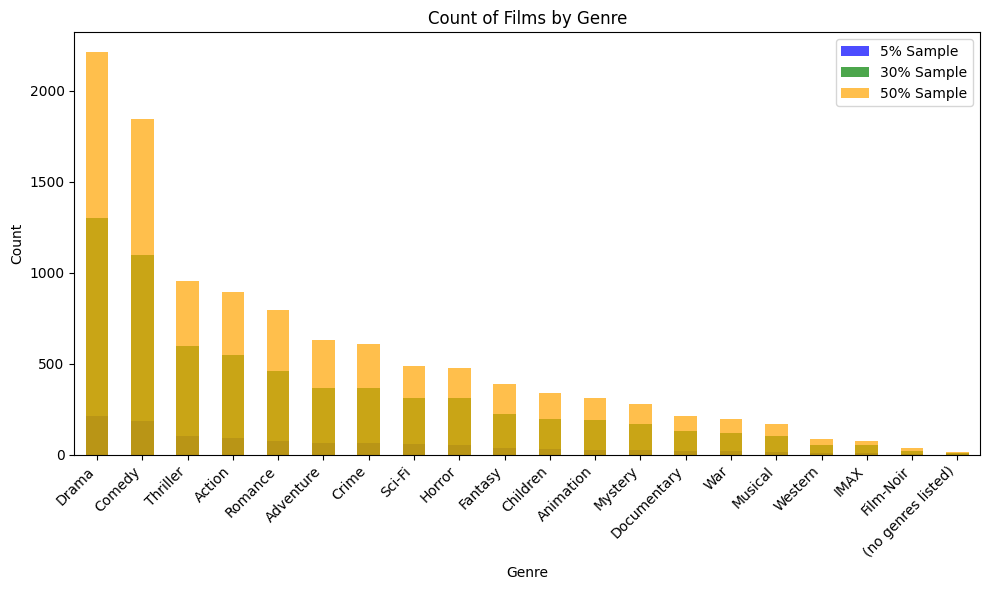

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming sample_5_percent, sample_30_percent, and sample_50_percent are already created as per previous instructions

# Create a list to hold all genres for 5% sample
all_genres_5_percent = []

# Iterate through each row of the DataFrame and append each genre to the list for 5% sample
for genres_list in sample_5_percent['genres']:
    all_genres_5_percent.extend(genres_list)

# Create a pandas Series from the list of all genres and count occurrences of each genre for 5% sample
genre_counts_5_percent = pd.Series(all_genres_5_percent).value_counts()

# Create a list to hold all genres for 30% sample
all_genres_30_percent = []

# Iterate through each row of the DataFrame and append each genre to the list for 30% sample
for genres_list in sample_30_percent['genres']:
    all_genres_30_percent.extend(genres_list)

# Create a pandas Series from the list of all genres and count occurrences of each genre for 30% sample
genre_counts_30_percent = pd.Series(all_genres_30_percent).value_counts()

# Create a list to hold all genres for 50% sample
all_genres_50_percent = []

# Iterate through each row of the DataFrame and append each genre to the list for 50% sample
for genres_list in sample_50_percent['genres']:
    all_genres_50_percent.extend(genres_list)

# Create a pandas Series from the list of all genres and count occurrences of each genre for 50% sample
genre_counts_50_percent = pd.Series(all_genres_50_percent).value_counts()

# Plotting the count of each genre for all samples on the same plot with different colors
plt.figure(figsize=(10, 6))

# Plotting for 5% sample
genre_counts_5_percent.plot(kind='bar', color='blue', alpha=0.7, label='5% Sample')

# Plotting for 30% sample
genre_counts_30_percent.plot(kind='bar', color='green', alpha=0.7, label='30% Sample')

# Plotting for 50% sample
genre_counts_50_percent.plot(kind='bar', color='orange', alpha=0.7, label='50% Sample')

plt.title('Count of Films by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


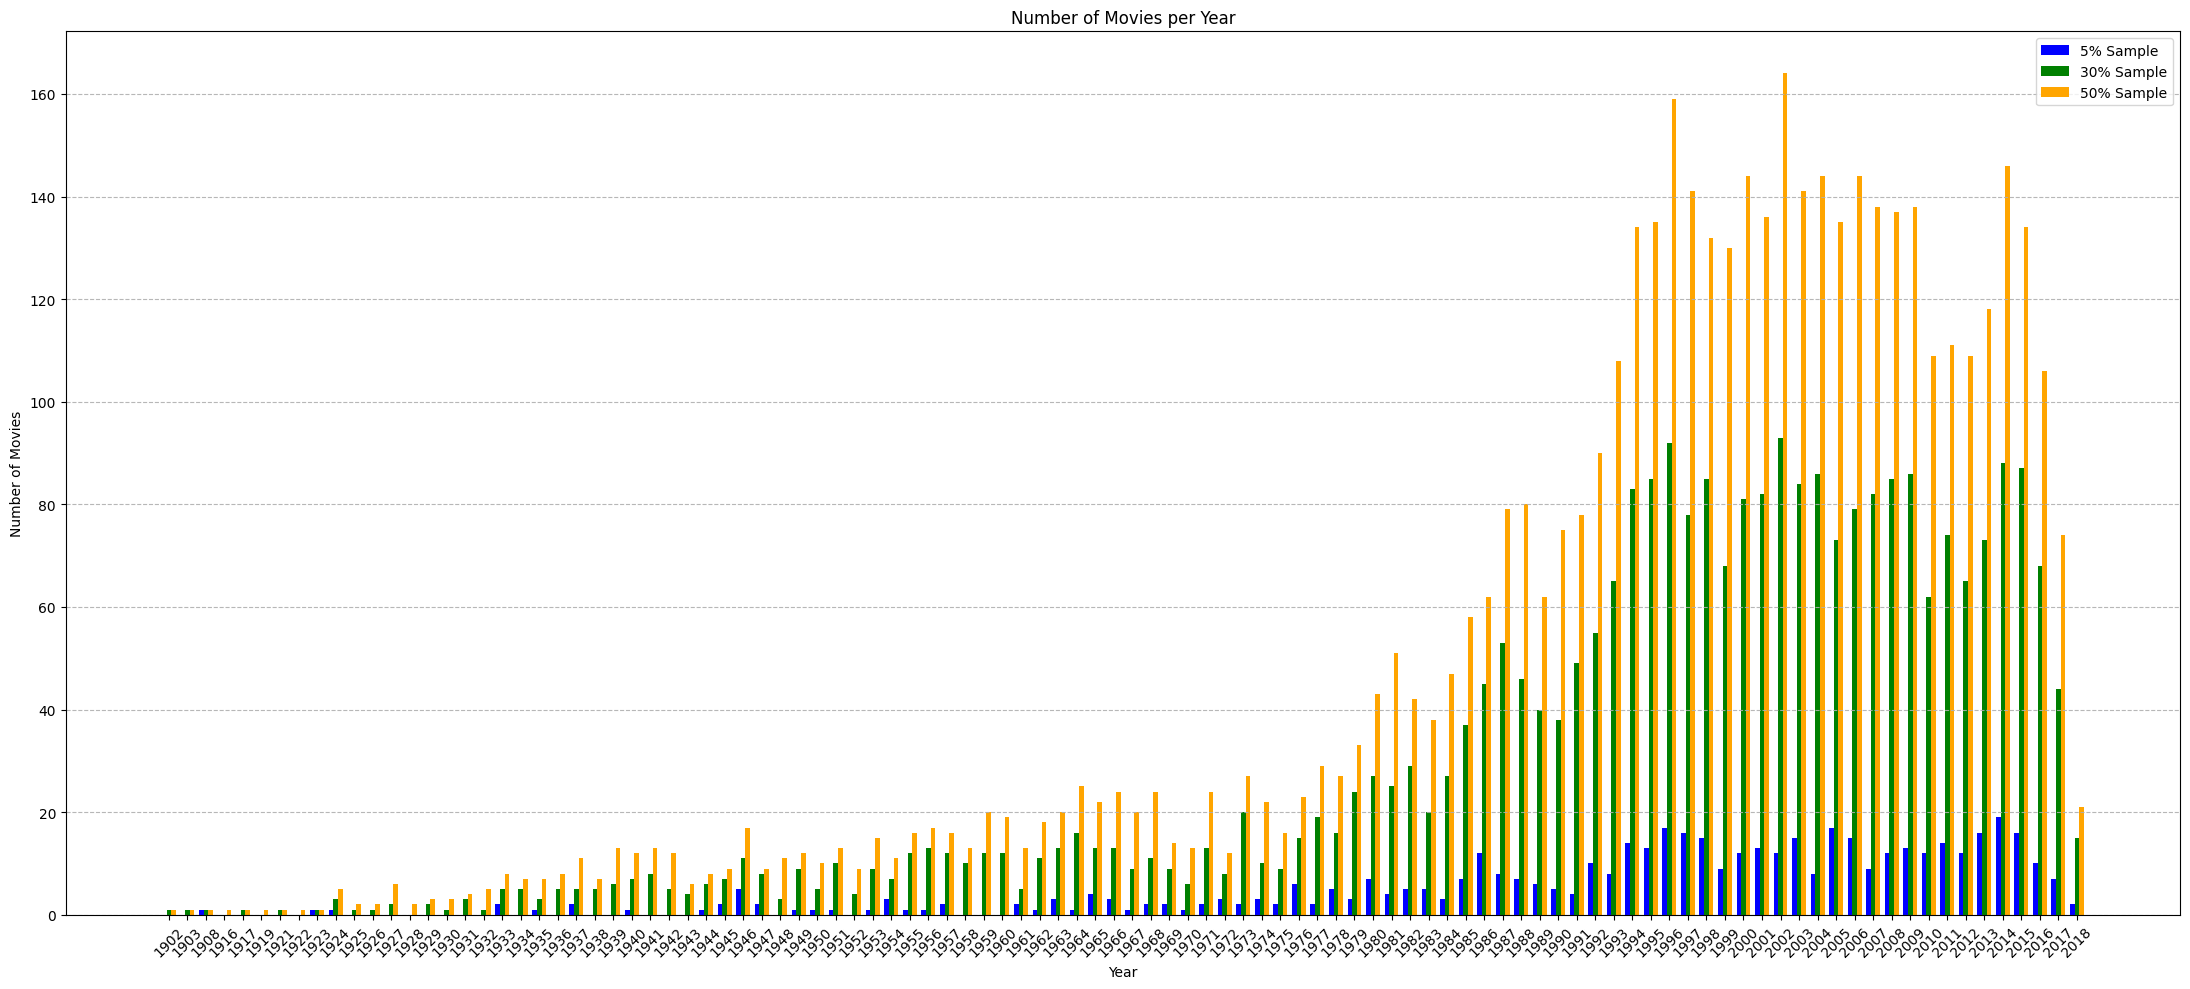

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Parquet file
ML = pd.read_parquet('cleaned/movielens_parquet')

# Extracting samples of 5%, 30%, and 50%
sample_5_percent = ML.sample(frac=0.05, random_state=42)
sample_30_percent = ML.sample(frac=0.3, random_state=42)
sample_50_percent = ML.sample(frac=0.5, random_state=42)

# Counting the number of movies per year for 5% sample
movies_per_year_5_percent = sample_5_percent['year'].value_counts().sort_index()

# Counting the number of movies per year for 30% sample
movies_per_year_30_percent = sample_30_percent['year'].value_counts().sort_index()

# Counting the number of movies per year for 50% sample
movies_per_year_50_percent = sample_50_percent['year'].value_counts().sort_index()

# Get the union of all years in all samples
all_years = sorted(set(movies_per_year_5_percent.index).union(set(movies_per_year_30_percent.index), set(movies_per_year_50_percent.index)))

# Plotting the count of movies per year for all samples
plt.figure(figsize=(22, 10))
bar_width = 0.25  # Adjust the width of each bar

# Plotting for 5% sample
plt.bar(range(len(all_years)), [movies_per_year_5_percent.get(year, 0) for year in all_years], 
        color='blue', width=bar_width, align='center', label='5% Sample')

# Plotting for 30% sample
plt.bar([x + bar_width for x in range(len(all_years))], [movies_per_year_30_percent.get(year, 0) for year in all_years], 
        color='green', width=bar_width, align='center', label='30% Sample')

# Plotting for 50% sample
plt.bar([x + 2 * bar_width for x in range(len(all_years))], [movies_per_year_50_percent.get(year, 0) for year in all_years], 
        color='orange', width=bar_width, align='center', label='50% Sample')

plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Adjust x-ticks positions and labels
plt.xticks([x + bar_width for x in range(len(all_years))], all_years, rotation=45)

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()


In [34]:
# We will also plot the 

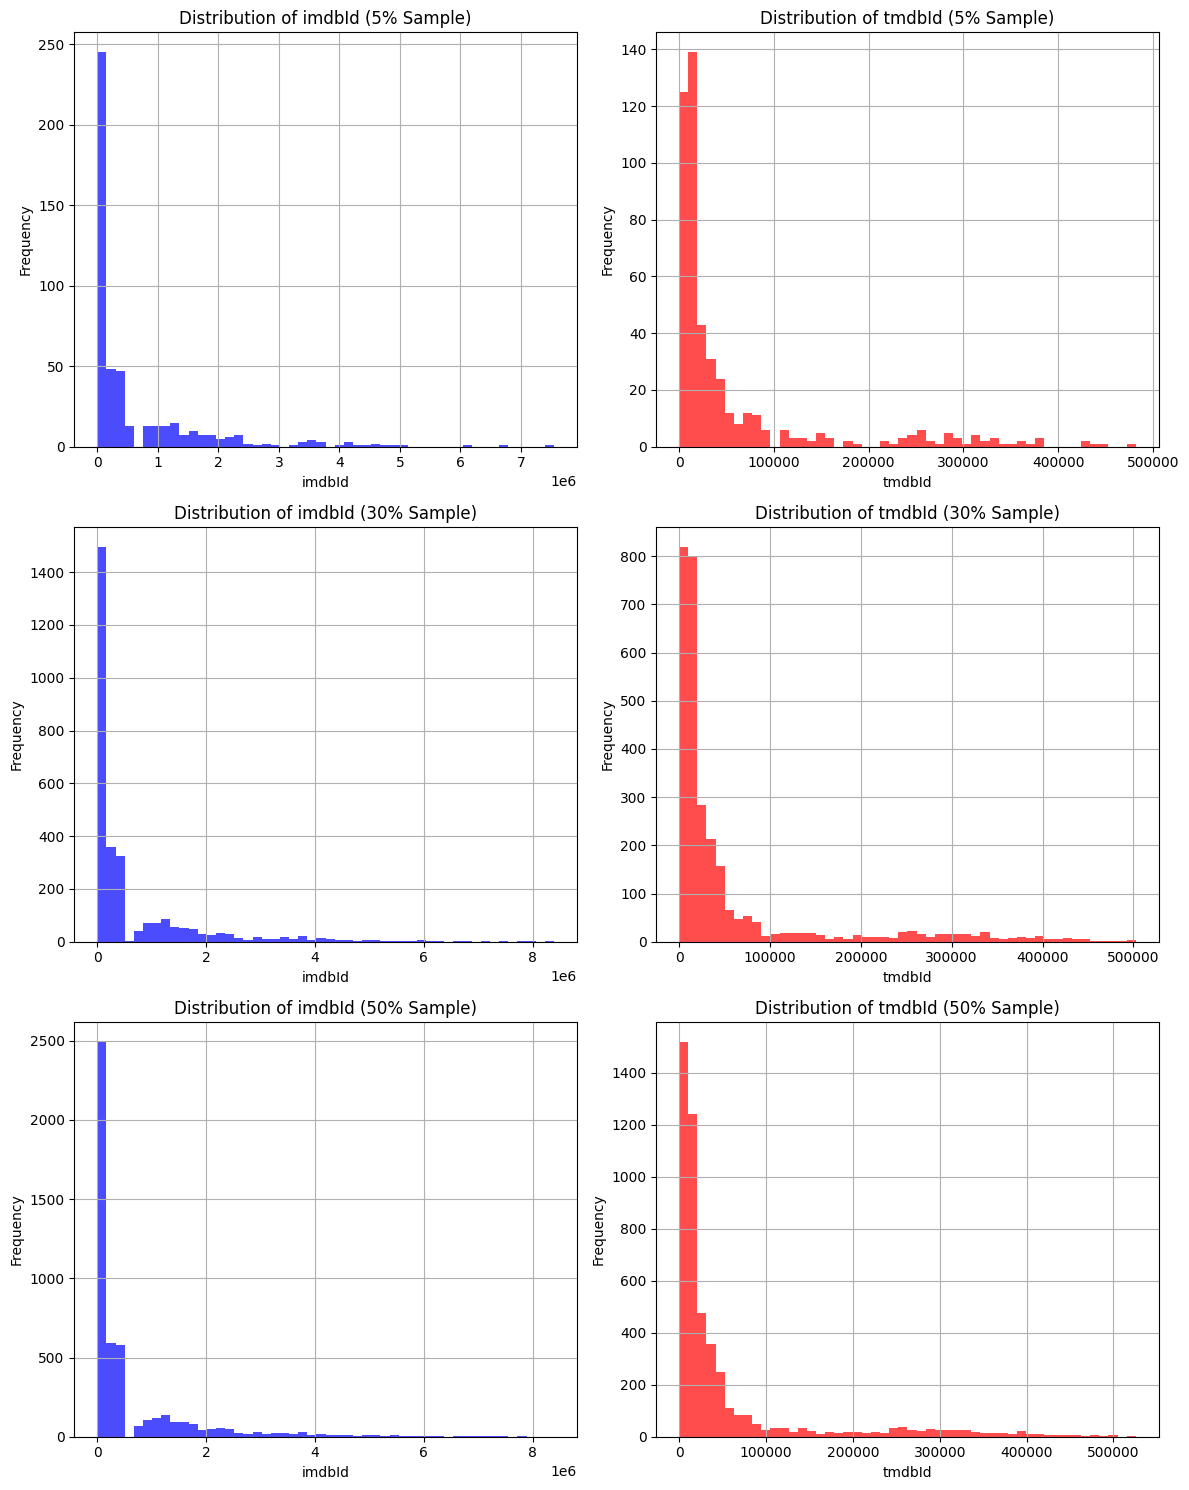

In [35]:
import matplotlib.pyplot as plt

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Plotting the distribution of imdbId for the 5% sample
axes[0, 0].hist(sample_5_percent['imdbId'], bins=50, color='blue', alpha=0.7)
axes[0, 0].set_title('Distribution of imdbId (5% Sample)')
axes[0, 0].set_xlabel('imdbId')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True)

# Plotting the distribution of tmdbId for the 5% sample
axes[0, 1].hist(sample_5_percent['tmdbId'], bins=50, color='red', alpha=0.7)
axes[0, 1].set_title('Distribution of tmdbId (5% Sample)')
axes[0, 1].set_xlabel('tmdbId')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True)

# Plotting the distribution of imdbId for the 30% sample
axes[1, 0].hist(sample_30_percent['imdbId'], bins=50, color='blue', alpha=0.7)
axes[1, 0].set_title('Distribution of imdbId (30% Sample)')
axes[1, 0].set_xlabel('imdbId')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True)

# Plotting the distribution of tmdbId for the 30% sample
axes[1, 1].hist(sample_30_percent['tmdbId'], bins=50, color='red', alpha=0.7)
axes[1, 1].set_title('Distribution of tmdbId (30% Sample)')
axes[1, 1].set_xlabel('tmdbId')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

# Plotting the distribution of imdbId for the 50% sample
axes[2, 0].hist(sample_50_percent['imdbId'], bins=50, color='blue', alpha=0.7)
axes[2, 0].set_title('Distribution of imdbId (50% Sample)')
axes[2, 0].set_xlabel('imdbId')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].grid(True)

# Plotting the distribution of tmdbId for the 50% sample
axes[2, 1].hist(sample_50_percent['tmdbId'], bins=50, color='red', alpha=0.7)
axes[2, 1].set_title('Distribution of tmdbId (50% Sample)')
axes[2, 1].set_xlabel('tmdbId')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


The plots show the right skewed distributions of both the columns

We also have to look into the `review_data`, each movie that is in the dataframe has all the reviews that have been done about them in the column `review_data`.

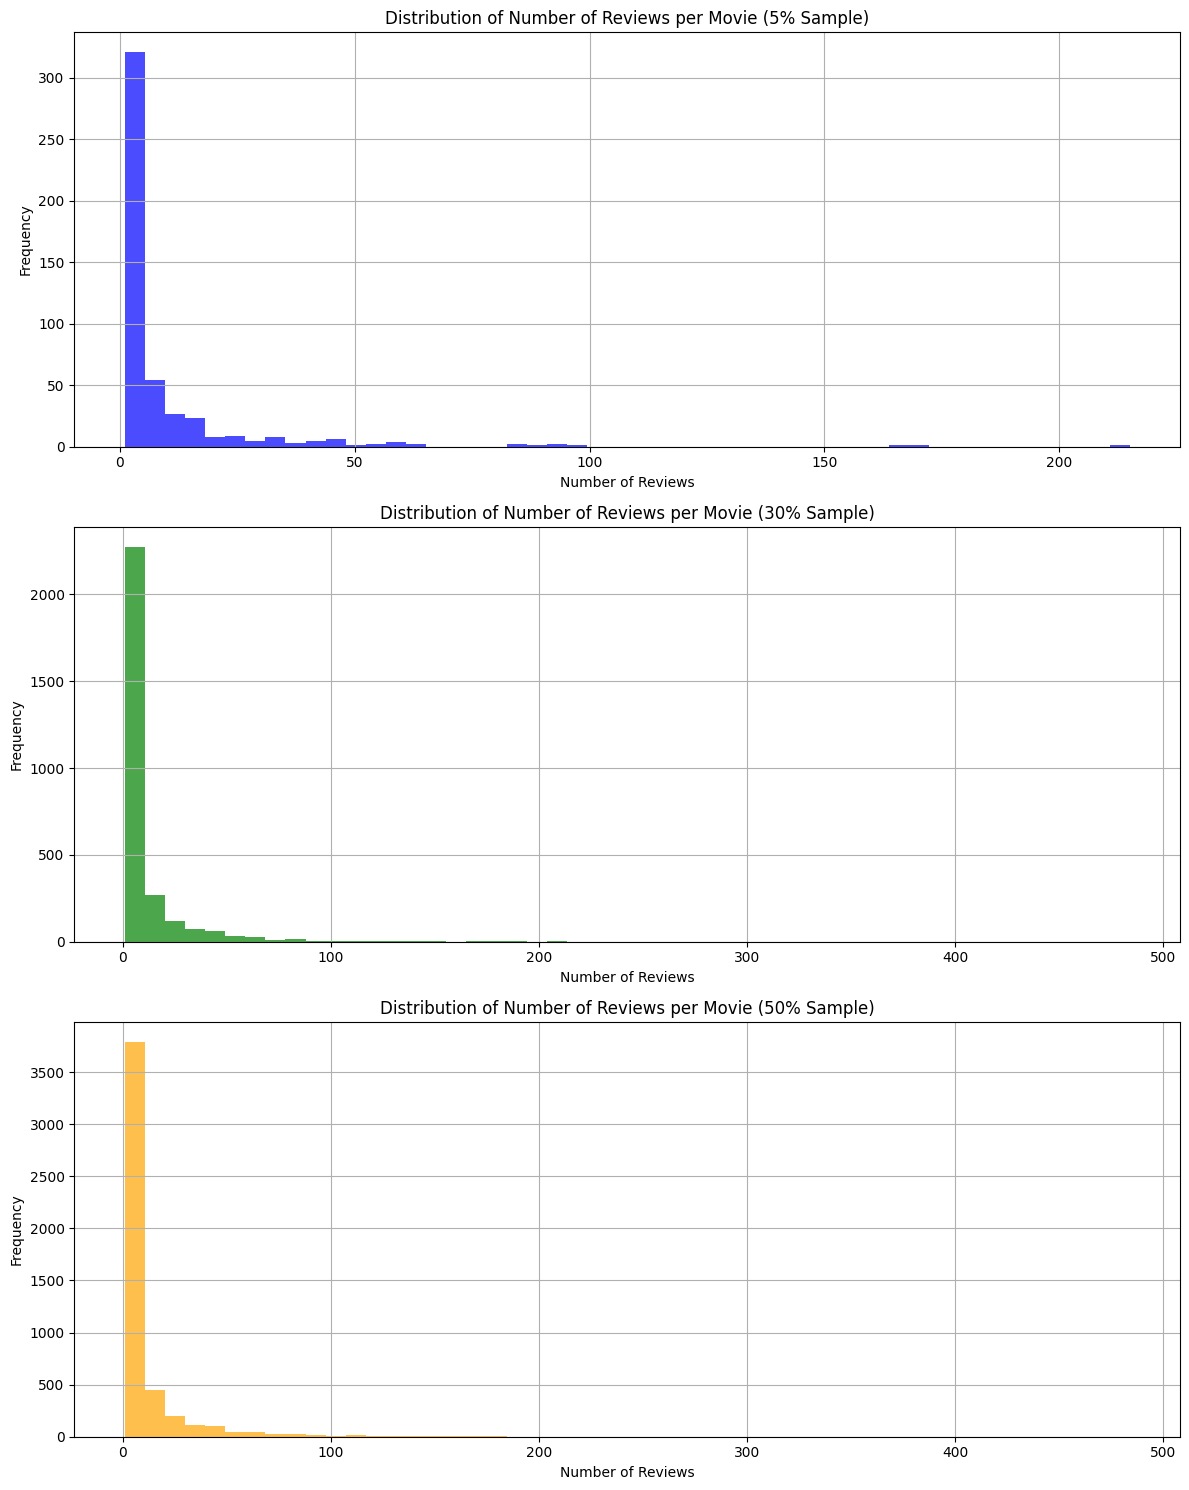

In [36]:
import matplotlib.pyplot as plt

# Calculate the number of reviews per movie for 5% sample
reviews_per_movie_5_percent = [len(review_list) for review_list in sample_5_percent['review_data']]

# Calculate the number of reviews per movie for 30% sample
reviews_per_movie_30_percent = [len(review_list) for review_list in sample_30_percent['review_data']]

# Calculate the number of reviews per movie for 50% sample
reviews_per_movie_50_percent = [len(review_list) for review_list in sample_50_percent['review_data']]

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Plotting the distribution of the number of reviews per movie for 5% sample
axes[0].hist(reviews_per_movie_5_percent, bins=50, color='blue', alpha=0.7)
axes[0].set_title('Distribution of Number of Reviews per Movie (5% Sample)')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plotting the distribution of the number of reviews per movie for 30% sample
axes[1].hist(reviews_per_movie_30_percent, bins=50, color='green', alpha=0.7)
axes[1].set_title('Distribution of Number of Reviews per Movie (30% Sample)')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Plotting the distribution of the number of reviews per movie for 50% sample
axes[2].hist(reviews_per_movie_50_percent, bins=50, color='orange', alpha=0.7)
axes[2].set_title('Distribution of Number of Reviews per Movie (50% Sample)')
axes[2].set_xlabel('Number of Reviews')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


We are going to check what movies are the most reviewed ones.

In [37]:
import pandas as pd

# Define a function to calculate top movies with most reviews
def calculate_top_movies(sample):
    # Create an empty list to store dictionaries
    movie_reviews_data = []

    # Iterate through each row of the DataFrame and append the movieId, title, and number of reviews to the list
    for index, row in sample.iterrows():
        movie_reviews_data.append({'movieId': row['movieId'], 'title': row['title'], 'num_reviews': len(row['review_data'])})

    # Convert the list of dictionaries into a DataFrame
    movie_reviews = pd.DataFrame(movie_reviews_data)

    # Sort the DataFrame by the number of reviews in descending order
    movie_reviews = movie_reviews.sort_values(by='num_reviews', ascending=False)

    # Get the top 10 movies with the most reviews
    top_10_movies = movie_reviews.head(10)

    return top_10_movies

# Calculate top 10 movies with most reviews for 5% sample
top_10_movies_5_percent = calculate_top_movies(sample_5_percent)
print("Top 10 movies with most reviews for 5% sample:")
print(top_10_movies_5_percent)

# Calculate top 10 movies with most reviews for 30% sample
top_10_movies_30_percent = calculate_top_movies(sample_30_percent)
print("\nTop 10 movies with most reviews for 30% sample:")
print(top_10_movies_30_percent)

# Calculate top 10 movies with most reviews for 50% sample
top_10_movies_50_percent = calculate_top_movies(sample_50_percent)
print("\nTop 10 movies with most reviews for 50% sample:")
print(top_10_movies_50_percent)


Top 10 movies with most reviews for 5% sample:
     movieId                                           title  num_reviews
392        1                                      Toy Story           215
476     4306                                          Shrek           170
296     1580                      Men in Black (a.k.a. MIB)           165
101      104                                  Happy Gilmore            99
320      551                Nightmare Before Christmas, The            94
11      2324            Life Is Beautiful (La Vita è bella)            94
385     5618  Spirited Away (Sen to Chihiro no kamikakushi)            87
439     1391                                  Mars Attacks!            86
272     1625                                      Game, The            83
248      353                                      Crow, The            64

Top 10 movies with most reviews for 30% sample:
      movieId                                            title  num_reviews
2389      296 

Looking at the numbers above we see that it is going to be difficult to plot data about the reviews since we have `9742` different movies and an average of more than `10` reviews per movie.

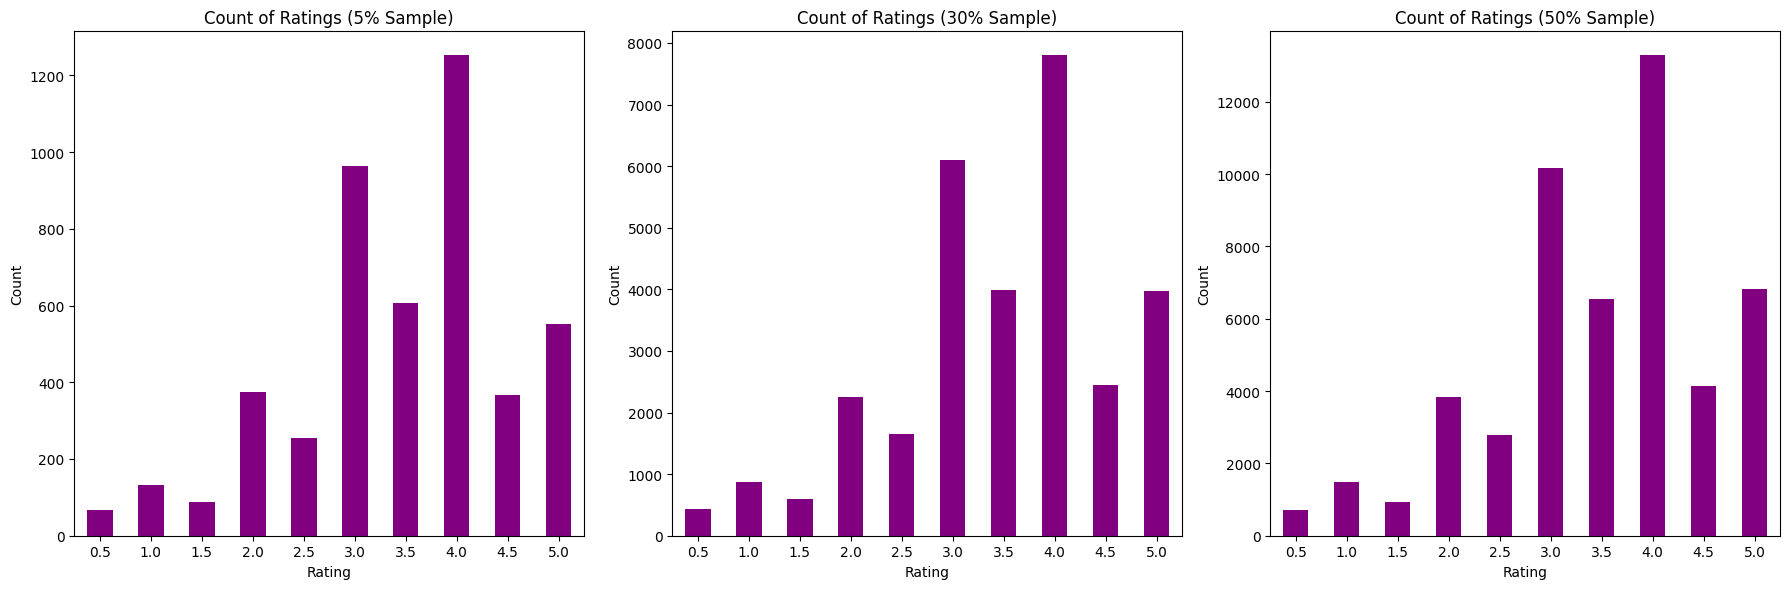

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to plot rating counts in subplots
def plot_rating_counts(sample, subplot_location, title):
    # Create a list to hold all ratings
    all_ratings = []

    # Iterate through each row of the DataFrame and append each rating to the list
    for reviews_list in sample['review_data']:
        for review in reviews_list:
            all_ratings.append(review['rating'])
            
    # Create a pandas Series from the list of all ratings and count occurrences of each rating
    rating_counts = pd.Series(all_ratings).value_counts().sort_index()

    # Plotting the count of each rating
    plt.subplot(subplot_location)
    rating_counts.plot(kind='bar', color='purple')
    plt.title(f'Count of Ratings ({title})')  # Set subplot title
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()

# Create subplots
plt.figure(figsize=(18, 6))

# Plot rating counts for 5% sample
plot_rating_counts(sample_5_percent, 131, '5% Sample')

# Plot rating counts for 30% sample
plot_rating_counts(sample_30_percent, 132, '30% Sample')

# Plot rating counts for 50% sample
plot_rating_counts(sample_50_percent, 133, '50% Sample')

# Show the plot
plt.show()


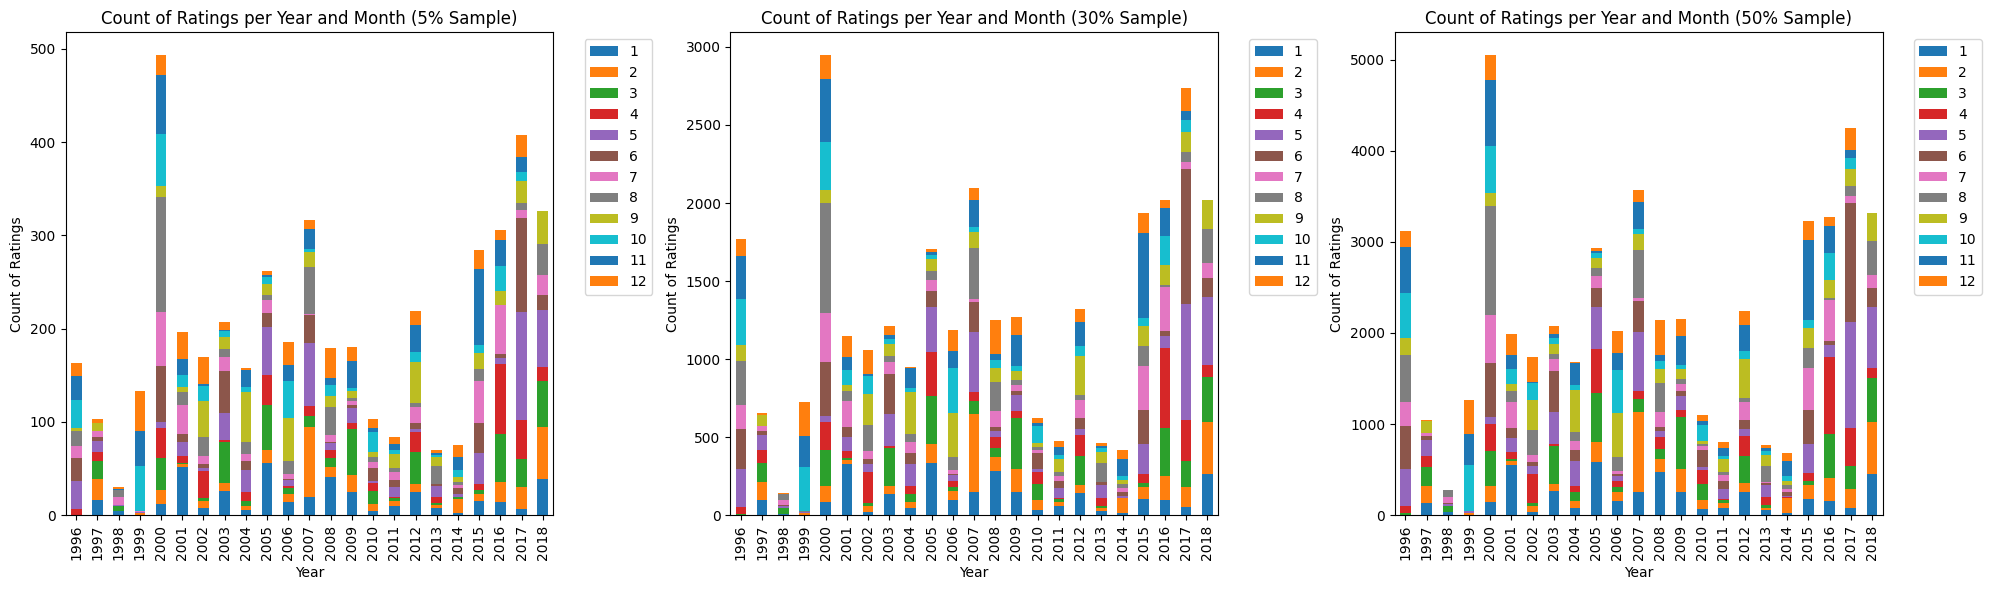

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to plot ratings per year and month in subplots
def plot_ratings_per_year_month(sample, title, subplot_location):
    # Create lists to hold all years and months
    all_years = []
    all_months = []

    # Iterate through each row of the DataFrame and extract year and month from the 'date' key of each dictionary
    for reviews_list in sample['review_data']:
        for review in reviews_list:
            if review['date'] is not None:  # Check if 'date' is not None
                year_month = review['date'].strftime('%Y-%m')
                year, month = year_month.split('-')
                all_years.append(int(year))
                all_months.append(int(month))

    # Create a pandas DataFrame from the lists of years and months
    ratings_per_year_month = pd.DataFrame({'Year': all_years, 'Month': all_months})

    # Plotting the count of ratings per year and month in subplot
    ratings_per_year_month.groupby(['Year', 'Month']).size().unstack().plot(kind='bar', stacked=True, ax=subplot_location)
    subplot_location.set_title(f'Count of Ratings per Year and Month ({title})')
    subplot_location.set_xlabel('Year')
    subplot_location.set_ylabel('Count of Ratings')
    subplot_location.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjusting legend position

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot ratings per year and month for 5% sample
plot_ratings_per_year_month(sample_5_percent, '5% Sample', axes[0])

# Plot ratings per year and month for 30% sample
plot_ratings_per_year_month(sample_30_percent, '30% Sample', axes[1])

# Plot ratings per year and month for 50% sample
plot_ratings_per_year_month(sample_50_percent, '50% Sample', axes[2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


We are going to check for the highest rated films in the two samples. First of all, we are going to check the top 10 highest rated films.

In [40]:
# Define a function to calculate the average rating for each movie
def calculate_average_rating(sample):
    # Create an empty dictionary to store movie ratings
    movie_ratings = {}

    # Iterate through each row of the DataFrame and calculate the average rating for each movie
    for index, row in sample.iterrows():
        movie_id = row['movieId']
        # Filter out None values from ratings
        ratings = [review['rating'] for review in row['review_data'] if review['rating'] is not None]
        # Calculate average rating if there are ratings present
        if ratings:
            average_rating = sum(ratings) / len(ratings)
            movie_ratings[movie_id] = average_rating

    # Sort the movies based on their average ratings in descending order
    sorted_movies = sorted(movie_ratings.items(), key=lambda x: x[1], reverse=True)

    # Return the sorted movies
    return sorted_movies

# Calculate the average ratings for the 5% sample
sorted_movies_5_percent = calculate_average_rating(sample_5_percent)

# Calculate the average ratings for the 30% sample
sorted_movies_30_percent = calculate_average_rating(sample_30_percent)

# Calculate the average ratings for the 50% sample
sorted_movies_50_percent = calculate_average_rating(sample_50_percent)

# Print the top 10 highest-rated films in each sample
print("Top 10 highest-rated films in 5% sample:")
for movie_id, rating in sorted_movies_5_percent[:10]:
    movie_title = ML[ML['movieId'] == movie_id]['title'].values[0]
    print(f"{movie_title}: {rating:.2f}")

print("\nTop 10 highest-rated films in 30% sample:")
for movie_id, rating in sorted_movies_30_percent[:10]:
    movie_title = ML[ML['movieId'] == movie_id]['title'].values[0]
    print(f"{movie_title}: {rating:.2f}")

print("\nTop 10 highest-rated films in 50% sample:")
for movie_id, rating in sorted_movies_50_percent[:10]:
    movie_title = ML[ML['movieId'] == movie_id]['title'].values[0]
    print(f"{movie_title}: {rating:.2f}")


Top 10 highest-rated films in 5% sample:
My Life as McDull (Mak dau goo si) : 5.00
Crossing Delancey : 5.00
Duel in the Sun : 5.00
Eva : 5.00
Decalogue, The (Dekalog) : 5.00
Tom Segura: Completely Normal : 5.00
Obsession : 5.00
Human : 5.00
Sandpiper, The : 5.00
Awful Truth, The : 4.75

Top 10 highest-rated films in 30% sample:
My Life as McDull (Mak dau goo si) : 5.00
Crossing Delancey : 5.00
Duel in the Sun : 5.00
Eva : 5.00
Decalogue, The (Dekalog) : 5.00
Tom Segura: Completely Normal : 5.00
Obsession : 5.00
Human : 5.00
Sandpiper, The : 5.00
Watermark : 5.00

Top 10 highest-rated films in 50% sample:
My Life as McDull (Mak dau goo si) : 5.00
Crossing Delancey : 5.00
Duel in the Sun : 5.00
Eva : 5.00
Decalogue, The (Dekalog) : 5.00
Tom Segura: Completely Normal : 5.00
Obsession : 5.00
Human : 5.00
Sandpiper, The : 5.00
Watermark : 5.00


## Feature Engeneering

We will do an unpacking of the dictionaries created in the `joining.ipynb` notebook. We end up selecting 5% as a good sampling of the original dataframe.

In [41]:
sample_5_percent.columns

Index(['movieId', 'title', 'genres', 'year', 'review_data', 'imdbId',
       'tmdbId'],
      dtype='object')

In [42]:
# We will unpack the data in the review_data column
# We will create a new dataframe with the unpacked data
# We will also add the movieId and title to the new dataframe
# We will also add the year to the new dataframe
# We will also add the genres to the new dataframe

# Create an empty list to store dictionaries
unpacked_reviews_data = []

# Iterate through each row of the DataFrame and unpack the review_data
for index, row in sample_5_percent.iterrows():
    for review in row['review_data']:
        unpacked_reviews_data.append({'movieId': row['movieId'], 'title': row['title'], 'year': row['year'], 'genres': row['genres'], 'userId': review['userId'], 'rating': review['rating'], 'date': review['date']})

# Convert the list of dictionaries into a DataFrame
unpacked_reviews_sample5_df = pd.DataFrame(unpacked_reviews_data)

# Print the first few rows of the DataFrame
unpacked_reviews_sample5_df.head()



,movieId,title,year,genres,userId,rating,date
0,45635,"Notorious Bettie Page, The",2005,[Drama],414,3.0,2008-07-15
1,45635,"Notorious Bettie Page, The",2005,[Drama],474,3.0,2006-12-08
2,1373,Star Trek V: The Final Frontier,1989,"[Action, Sci-Fi]",19,1.0,2000-08-08
3,1373,Star Trek V: The Final Frontier,1989,"[Action, Sci-Fi]",42,4.0,2001-07-27
4,1373,Star Trek V: The Final Frontier,1989,"[Action, Sci-Fi]",51,5.0,2009-01-02


In [43]:
# Create new columns for each unique genre
unique_genres = unpacked_reviews_sample5_df['genres'].explode().unique()

for genre in unique_genres:
    unpacked_reviews_sample5_df[genre] = unpacked_reviews_sample5_df['genres'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'genres' column
unpacked_reviews_sample5_df = unpacked_reviews_sample5_df.drop(columns=['genres'])

# Print the updated DataFrame
print(unpacked_reviews_sample5_df.head())

   movieId                             title  year  userId  rating  \
0    45635       Notorious Bettie Page, The   2005     414     3.0   
1    45635       Notorious Bettie Page, The   2005     474     3.0   
2     1373  Star Trek V: The Final Frontier   1989      19     1.0   
3     1373  Star Trek V: The Final Frontier   1989      42     4.0   
4     1373  Star Trek V: The Final Frontier   1989      51     5.0   

         date  Drama  Action  Sci-Fi  Comedy  ...  Adventure  Fantasy  IMAX  \
0  2008-07-15      1       0       0       0  ...          0        0     0   
1  2006-12-08      1       0       0       0  ...          0        0     0   
2  2000-08-08      0       1       1       0  ...          0        0     0   
3  2001-07-27      0       1       1       0  ...          0        0     0   
4  2009-01-02      0       1       1       0  ...          0        0     0   

   Animation  Musical  Horror  Film-Noir  Western  Mystery  (no genres listed)  
0          0        0  

In [44]:
# We will unpack the data in the review_data column
# We will create a new dataframe with the unpacked data
# We will also add the movieId and title to the new dataframe
# We will also add the year to the new dataframe
# We will also add the genres to the new dataframe

# Create an empty list to store dictionaries
unpacked_reviews_data_30percent = []

# Iterate through each row of the DataFrame and unpack the review_data
for index, row in sample_30_percent.iterrows():
    for review in row['review_data']:
        unpacked_reviews_data.append({'movieId': row['movieId'], 'title': row['title'], 'year': row['year'], 'genres': row['genres'], 'userId': review['userId'], 'rating': review['rating'], 'date': review['date']})

# Convert the list of dictionaries into a DataFrame
unpacked_reviews_sample30_df = pd.DataFrame(unpacked_reviews_data)

# Print the first few rows of the DataFrame
unpacked_reviews_sample30_df.head()



,movieId,title,year,genres,userId,rating,date
0,45635,"Notorious Bettie Page, The",2005,[Drama],414,3.0,2008-07-15
1,45635,"Notorious Bettie Page, The",2005,[Drama],474,3.0,2006-12-08
2,1373,Star Trek V: The Final Frontier,1989,"[Action, Sci-Fi]",19,1.0,2000-08-08
3,1373,Star Trek V: The Final Frontier,1989,"[Action, Sci-Fi]",42,4.0,2001-07-27
4,1373,Star Trek V: The Final Frontier,1989,"[Action, Sci-Fi]",51,5.0,2009-01-02


In [45]:
# Create new columns for each unique genre
unique_genres_30 = unpacked_reviews_sample30_df['genres'].explode().unique()

for genre in unique_genres:
    unpacked_reviews_sample30_df[genre] = unpacked_reviews_sample30_df['genres'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'genres' column
unpacked_reviews_sample30_df = unpacked_reviews_sample30_df.drop(columns=['genres'])

# Print the updated DataFrame
print(unpacked_reviews_sample30_df.head())

   movieId                             title  year  userId  rating  \
0    45635       Notorious Bettie Page, The   2005     414     3.0   
1    45635       Notorious Bettie Page, The   2005     474     3.0   
2     1373  Star Trek V: The Final Frontier   1989      19     1.0   
3     1373  Star Trek V: The Final Frontier   1989      42     4.0   
4     1373  Star Trek V: The Final Frontier   1989      51     5.0   

         date  Drama  Action  Sci-Fi  Comedy  ...  Adventure  Fantasy  IMAX  \
0  2008-07-15      1       0       0       0  ...          0        0     0   
1  2006-12-08      1       0       0       0  ...          0        0     0   
2  2000-08-08      0       1       1       0  ...          0        0     0   
3  2001-07-27      0       1       1       0  ...          0        0     0   
4  2009-01-02      0       1       1       0  ...          0        0     0   

   Animation  Musical  Horror  Film-Noir  Western  Mystery  (no genres listed)  
0          0        0  

In [46]:
# Create an empty list to store dictionaries
unpacked_reviews_data_50percent = []

# Iterate through each row of the DataFrame and unpack the review_data
for index, row in sample_50_percent.iterrows():
    for review in row['review_data']:
        unpacked_reviews_data_50percent.append({'movieId': row['movieId'], 'title': row['title'], 'year': row['year'], 'genres': row['genres'], 'userId': review['userId'], 'rating': review['rating'], 'date': review['date']})

# Convert the list of dictionaries into a DataFrame
unpacked_reviews_sample50_df = pd.DataFrame(unpacked_reviews_data_50percent)

# Print the first few rows of the DataFrame
unpacked_reviews_sample50_df.head()


,movieId,title,year,genres,userId,rating,date
0,45635,"Notorious Bettie Page, The",2005,[Drama],414,3.0,2008-07-15
1,45635,"Notorious Bettie Page, The",2005,[Drama],474,3.0,2006-12-08
2,1373,Star Trek V: The Final Frontier,1989,"[Action, Sci-Fi]",19,1.0,2000-08-08
3,1373,Star Trek V: The Final Frontier,1989,"[Action, Sci-Fi]",42,4.0,2001-07-27
4,1373,Star Trek V: The Final Frontier,1989,"[Action, Sci-Fi]",51,5.0,2009-01-02


In [47]:
# Create new columns for each unique genre
unique_genres_50 = unpacked_reviews_sample50_df['genres'].explode().unique()

for genre in unique_genres_50:
    unpacked_reviews_sample50_df[genre] = unpacked_reviews_sample50_df['genres'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'genres' column
unpacked_reviews_sample50_df = unpacked_reviews_sample50_df.drop(columns=['genres'])

# Print the updated DataFrame
print(unpacked_reviews_sample50_df.head())


   movieId                             title  year  userId  rating  \
0    45635       Notorious Bettie Page, The   2005     414     3.0   
1    45635       Notorious Bettie Page, The   2005     474     3.0   
2     1373  Star Trek V: The Final Frontier   1989      19     1.0   
3     1373  Star Trek V: The Final Frontier   1989      42     4.0   
4     1373  Star Trek V: The Final Frontier   1989      51     5.0   

         date  Drama  Action  Sci-Fi  Comedy  ...  Adventure  Fantasy  IMAX  \
0  2008-07-15      1       0       0       0  ...          0        0     0   
1  2006-12-08      1       0       0       0  ...          0        0     0   
2  2000-08-08      0       1       1       0  ...          0        0     0   
3  2001-07-27      0       1       1       0  ...          0        0     0   
4  2009-01-02      0       1       1       0  ...          0        0     0   

   Animation  Musical  Horror  Film-Noir  Western  Mystery  (no genres listed)  
0          0        0  

This final version dataframe is the one we are going to use for modelling since, as observed in this file, it follows the same distributions than the original file but it has 5% of the data so it is less heavy memory-wise. We will import this file as a parquet for memory purposes aswell.

In [48]:
# We export the files as a parquet file
unpacked_reviews_sample5_df.to_parquet('cleaned/final_sample5_parquet')
unpacked_reviews_sample30_df.to_parquet('cleaned/final_sample30_parquet')
unpacked_reviews_sample50_df.to_parquet('cleaned/final_sample50_parquet')